In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, 
                             accuracy_score)
import cv2

In [3]:
cat2=['Melanoma Skin Cancer Nevi and Moles']

In [4]:
cat=['Acne and Rosacea Photos',
 'Normal',
 'vitiligo',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
     'Melanoma Skin Cancer Nevi and Moles',
 'Eczema Photos']

In [5]:
cat=['Normal','vitiligo']

In [6]:
import pandas as pd
import os
def data_dictionary():
    path_train=r"C:\Users\teknoloji5\Downloads\skin\skin\train/"
    #list_train=os.listdir(path_train)
    cat=['Normal','vitiligo']
   #cat=['Normal','Melanoma Skin Cancer Nevi and Moles']
    #cat=['Normal','Eczema Photos']
    #cat=['Normal','Tinea Ringworm Candidiasis and other Fungal Infections']
    #cat=['Normal','Acne and Rosacea Photos']
    train_dictionary={"image_path":[],"target":[]}
    k=0
    for i in cat:
        path_disease_train=path_train+i
        image_list_train=os.listdir(path_disease_train)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j   
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(k)     
        k+=1
    train_df=pd.DataFrame(train_dictionary)
    return  train_df

In [7]:
train=data_dictionary()

In [8]:
import cv2
images=[]
label=[]
for i in train['image_path']:
    if i!="/kaggle/input/skindatasets/skin/train/Normal/34.avif":
        img=cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img=cv2.resize(img,(100,100))
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #img=cv2.resize(img,(64,64),interpolation=cv2.INTER_AREA)
        #img=resize_and_rescale(img)
        images.append(img)

In [9]:
label=train['target']

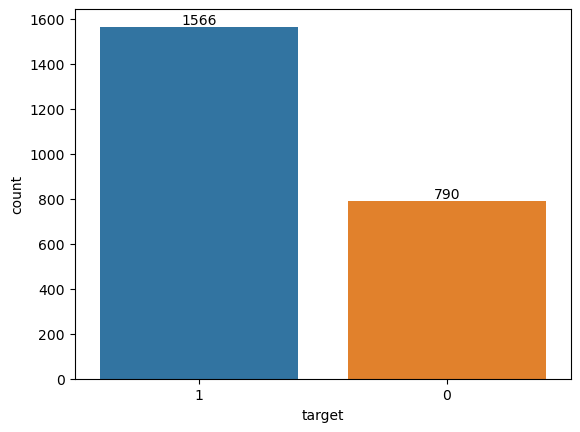

In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, \
                             accuracy_score)

ax = sns.countplot(x=train['target'],
                   order=train['target'].value_counts(ascending=False).index);

abs_values = train['target'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values);

In [11]:
len(label)

2356

In [12]:
len(images)

2356

In [13]:
import numpy as np
import pandas as pd

In [14]:
data=np.array(images)

In [15]:
label=np.array(label)

In [16]:
data.shape

(2356, 100, 100, 3)

In [17]:
label.shape

(2356,)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2,random_state=4)
#X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2,random_state=1)

In [33]:
X_train.shape

(1884, 100, 100, 3)

In [34]:
X_test.shape

(472, 100, 100, 3)

In [36]:
y_test.shape

(472,)

In [37]:
y_train.shape

(1884,)

In [38]:
from tensorflow.keras.applications import  VGG19,EfficientNetB0,VGG16,InceptionV3,ResNet50,EfficientNetB3
from tensorflow.keras.models import Model
from keras.applications.vgg16 import preprocess_input

In [39]:
vgg_model = ResNet50(weights = 'imagenet',  include_top = False, input_shape = (100, 100, 3)) 

In [40]:
# let's make all layers non-trainable
for layer in vgg_model.layers : 
    layer.trainable = False

In [41]:
features_train=vgg_model.predict(X_train)

59/59 [==============================] - 26s 427ms/step


In [42]:
features_test=vgg_model.predict(X_test)

15/15 [==============================] - 6s 416ms/step


In [43]:
features_train.shape

(1884, 4, 4, 2048)

In [44]:
features_test.shape

(472, 4, 4, 2048)

In [45]:
num_train=X_train.shape[0]
num_test=X_test.shape[0]

In [46]:
x_test=features_test.reshape(num_test,-1)

In [47]:
x_test.shape

(472, 32768)

In [48]:
x_train=features_train.reshape(num_train,-1)

In [49]:
x_test.shape

(472, 32768)

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components =500)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)


In [52]:
X_train.shape

(1884, 500)

In [53]:
pip install lazypredict

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/87/0f/7630ee4fea60ebab5b0e3c35df570cb295c91ece537231a38105c0f243e8/lightgbm-4.0.0-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/75/dd/9afe0d9d0f61a5384c3932626a022e38c396a5d88e6f5345ad2f7b576747/xgboost-1.7.6-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 1.4 MB/s eta 0:00:01
   - -------------------------------------- 0.1/1.3 MB 825.8 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.3 MB 1.3 MB/s eta 0:00:01
   ------- -------------------------------- 0.2/1.3 MB 1.6 MB/s eta 0:00:01
   ---------- ----------------------------- 0.3/1.3 MB 1.9 MB/s eta 0:00:01
   ---------------- ----------------------- 0.5/1.3 MB 2.6 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.3 MB 2.7 MB

In [54]:
from lazypredict.Supervised import LazyClassifier
clf= LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train,X_test,y_train,y_test)

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [01:08<00:01,  1.23s/it]

[LightGBM] [Info] Number of positive: 1254, number of negative: 630
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 127500
[LightGBM] [Info] Number of data points in the train set: 1884, number of used features: 500
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.665605 -> initscore=0.688374
[LightGBM] [Info] Start training from score 0.688374


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [01:10<00:00,  2.43s/it]


In [55]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.98,0.97,0.97,0.98,0.10
LinearSVC,0.97,0.96,0.96,0.97,0.55
PassiveAggressiveClassifier,0.97,0.96,0.96,0.97,0.12
LinearDiscriminantAnalysis,0.97,0.96,0.96,0.97,0.20
RidgeClassifierCV,0.97,0.96,0.96,0.97,0.17
RidgeClassifier,0.97,0.96,0.96,0.97,0.07
NearestCentroid,0.97,0.96,0.96,0.97,0.09
Perceptron,0.96,0.95,0.95,0.96,0.09
CalibratedClassifierCV,0.96,0.95,0.95,0.96,9.51


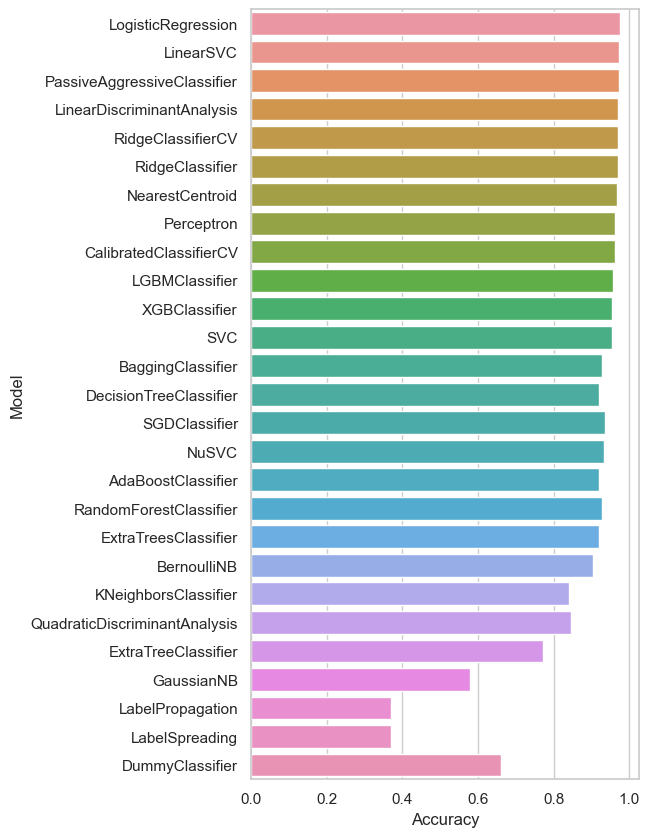

In [56]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="Accuracy", data=predictions)